<a href="https://colab.research.google.com/github/chenshuo/notes/blob/master/notebooks/DSP_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital signal processing beginner's labs

_A companion notebook to undergraduate digital signal processing courses._

Author: Shuo Chen (chenshuo _at_ chenshuo.com)

Latest version: https://github.com/chenshuo/notes/blob/master/notebooks/DSP_Labs.ipynb

**Links**

* [Allen Downey - ThinkDSP](https://github.com/AllenDowney/ThinkDSP)
  * [Introduction to Digital Signal Processing - PyCon 2018](https://www.youtube.com/watch?v=SrJq2AzXZME)
* [StrathSDR - DSP Introductory Notebooks](https://github.com/strath-sdr/dsp_notebooks)
* [Berkeley EE123: Digital Signal Processing - 2019 Spring](https://sites.google.com/berkeley.edu/ee123-sp19/home?authuser=0)
  * [EE120 Labs](https://github.com/dominiccarrano/ee-120-labs)
* [Purdue ECE438: Digital Signal Processing with Applications - Spring 2022](https://engineering.purdue.edu/~ece438/)
  * [Labs](https://engineering.purdue.edu/VISE/ee438L/)



In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 5.5.0
ipykernel        : 4.10.1
ipywidgets       : 7.7.1
jupyter_client   : 5.3.5
jupyter_core     : 4.11.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.6.6
nbconvert        : 5.6.1
nbformat         : 5.4.0
notebook         : 5.3.1
qtconsole        : 5.3.1
traitlets        : 5.1.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
# import control

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
def draw_pzmap(dlti):
  plt.plot(np.real(dlti.zeros), np.imag(dlti.zeros), 'o', mfc='none')
  plt.plot(np.real(dlti.poles), np.imag(dlti.poles), 'x')
  w = np.linspace(0, 2*np.pi)
  plt.plot(np.cos(w), np.sin(w), 'y--')
  limits = plt.axis("equal")
  plt.grid()

def draw_resp_stem(x, y):
  plt.stem(x, use_line_collection=True)
  (markerline, _, _) = plt.stem(y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

np.set_printoptions(suppress=True)

# Lab1: Discrete LTI systems

**Weighted Moving Average**

* Memoryless

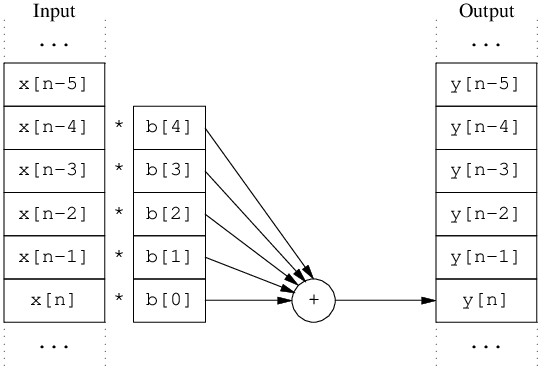

$$\begin{aligned}
  y[n] &= \sum_{i=0}^{L}b[i] x[n-i] \\
       & = b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L]
\end{aligned} $$

* [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html), [oaconvolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.oaconvolve.html), [fftconvolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html)
* [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)
* [scipy.signal.dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html)
* [scipy.signal.dlti.output](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.output.html)
---

In [ ]:
from collections.abc import Sequence

def direct_wma(b : Sequence, x : Sequence) -> Sequence:
  y = np.zeros(len(x))
  x_pad = np.concatenate((np.zeros(len(b)-1), x))
  b_rev = np.array(b[::-1], dtype='d')
  for i in range(len(x)):
    y[i] = np.dot(b_rev, x_pad[i : i + len(b)])
  return y

b = [2, 1]
x = np.arange(10) 
y = direct_wma(b, x)
print(np.array([x, y]).T)

[[ 0.  0.]
 [ 1.  2.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4. 11.]
 [ 5. 14.]
 [ 6. 17.]
 [ 7. 20.]
 [ 8. 23.]
 [ 9. 26.]]


In [ ]:
b = [2, 1]
x = np.arange(10, dtype='d')
y = signal.lfilter(b, [1], x)
print(np.array([x, y]).T)

[[ 0.  0.]
 [ 1.  2.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4. 11.]
 [ 5. 14.]
 [ 6. 17.]
 [ 7. 20.]
 [ 8. 23.]
 [ 9. 26.]]


**Recursive, or ladder**

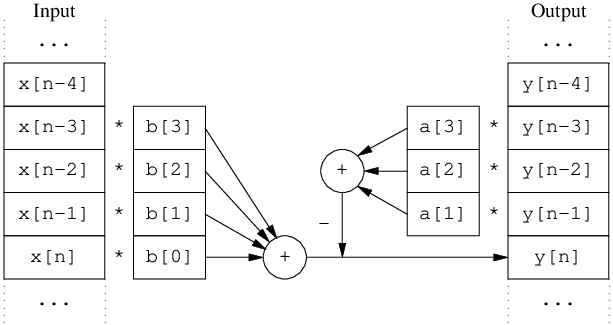

$$\begin{aligned}
y[n] = &\sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i\,]y[n-i\,] \\
 = & \  b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L] \\
        &-(a[1]y[n-1]+a[2]y[n-2]+\cdots+a[M]y[n-M])
\end{aligned}$$

* [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)
* [scipy.signal.dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html)
* [scipy.signal.dlti.output](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.output.html)

What if `x` is *Iterable*, not *Sequence*?

Realtime DSP.

In [ ]:
# Pseudo code only

def iterative_dlti(b : list, a : list, x_in : Iterable) -> Iterable:
  x_vec = np.zeros(len(b))  # circular buffer
  y_vec = np.zeros(len(a))  # circular buffer
  for u in x_in:
    # update x_vec
    yn = np.dot(x_vec, b) - np.dot(y_vec, a)
    # update y_vec
    yield yn

for y in iterative_dlti(b, a, x):
  output(y)

## Moving average

Julius O. Smith, _Introduction to Digital Filters with Audio Applications_, http://ccrma.stanford.edu/~jos/filters/

Chapter 1: https://ccrma.stanford.edu/~jos/filters/Simplest_Lowpass_Filter.html

$y[n] = \frac{1}{2}x[n]+\frac{1}{2}x[n-1]$

In [ ]:
b = [1/2, 1/2]

x = np.arange(11)
y = signal.lfilter(b, [1], x)  # or signal.convolve(b, x)
print(np.array([x, y]).T)

[[ 0.   0. ]
 [ 1.   0.5]
 [ 2.   1.5]
 [ 3.   2.5]
 [ 4.   3.5]
 [ 5.   4.5]
 [ 6.   5.5]
 [ 7.   6.5]
 [ 8.   7.5]
 [ 9.   8.5]
 [10.   9.5]]


[scipy.signal.dlti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html) Discrete-time linear time invariant system 

Zeros: [-1.]
Poles: []


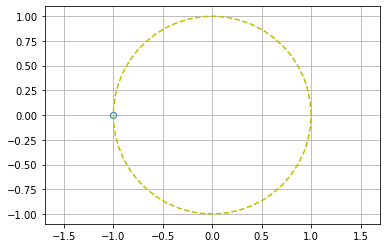

In [ ]:
dlti = signal.dlti(b, [1])
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)
draw_pzmap(dlti)

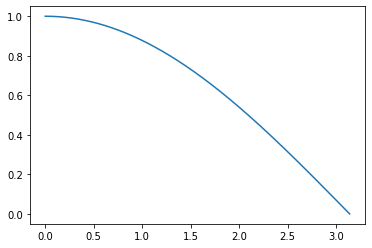

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w, np.abs(mag))

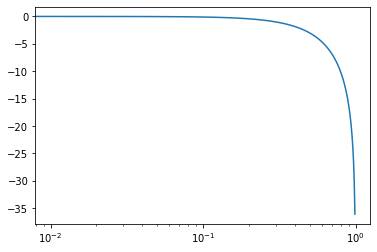

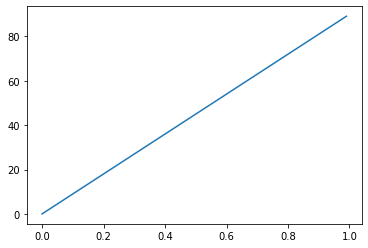

In [ ]:
w, mag, phase = dlti.bode()
plt.semilogx(w/np.pi, mag)
plt.figure(2)
plt.plot(w/np.pi,phase)

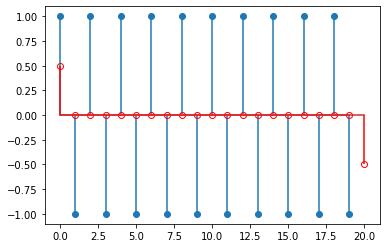

In [ ]:
w = np.arange(20) * np.pi
x = np.cos(w)  # [1, -1, 1, -1, 1, -1, ...]
y = np.convolve(b, x)

plt.stem(x, use_line_collection=True)
plt.stem(y, linefmt='r', markerfmt='ro', use_line_collection=True)

In [ ]:
@interact(f = (0, 1, 0.02))
def resp(f = 0.02):
  t = np.linspace(0, 1, 101)
  x = np.cos(t * 2*np.pi * f * 100)
  plt.plot(t, x)
  y = signal.lfilter([1/2, 1/2], [1], x)
  plt.plot(t, y)
  plt.show()

interactive(children=(FloatSlider(value=0.02, description='f', max=1.0, step=0.02), Output()), _dom_classes=('…

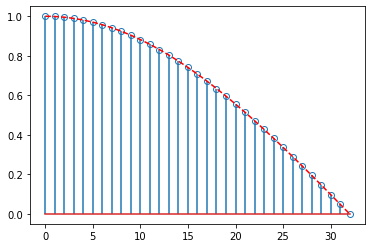

In [ ]:
fft = np.fft.rfft([1/2, 1/2], n=64)  # zero padding
(marker, _, _) = plt.stem(np.abs(fft), use_line_collection=True)
marker.set_markerfacecolor('none')

fr = dlti.freqresp(w=np.linspace(0, 1, len(fft)) * np.pi)[1]
plt.plot(np.abs(fr), 'r--')

**n = 3**

$y[n] = \frac{1}{3}x[n] + \frac{1}{3}x[n-1] + \frac{1}{3}x[n-2]$

min_mag = -84.37 dB


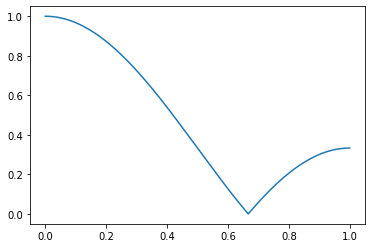

In [ ]:
b3 = [1/3, 1/3, 1/3]
dlti3 = signal.dlti(b3, [1])

w, mag = dlti3.freqresp()
plt.plot(w/np.pi, np.abs(mag))
print('min_mag = %.2f dB' % (20 * np.log10(np.min(np.abs(mag)))))

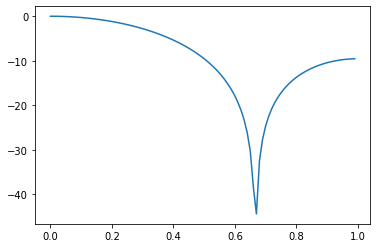

In [ ]:
w, mag, phase = dlti3.bode()
plt.plot(w/np.pi, mag)

[ 120. -120.]


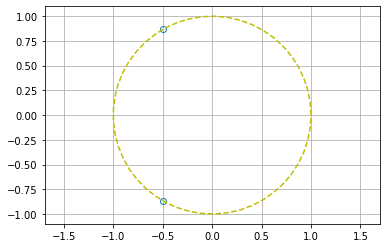

In [ ]:
draw_pzmap(dlti3)
print(np.angle(dlti3.zeros)/np.pi*180)

[ 1.  -0.5 -0.5  1.  -0.5 -0.5  1.  -0.5 -0.5  1. ]


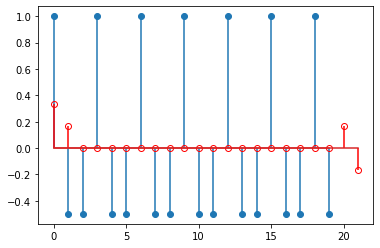

In [ ]:
t = np.arange(20)
x = np.cos(t * 2/3 * np.pi)
y = np.convolve(x, b3)

draw_resp_stem(x, y)
print(x[0:10])

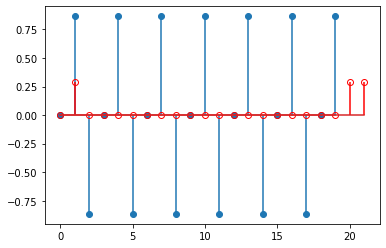

In [ ]:
t = np.arange(20)
x = np.sin(t * 2/3 * np.pi)
y = np.convolve(x, b3)
draw_resp_stem(x, y)

# x = [1, -1, 0, 1, -1, 0, 1, -1, 0, 1]

In [ ]:
@interact(phase=(0, 90, 5))
def resp(phase=0):
  t = np.arange(15)
  x = np.cos(t * 2/3 * np.pi - phase / 180 * np.pi)
  y = signal.lfilter(b3, [1], x)
  plt.stem(t, x, use_line_collection=True)
  t1 = np.arange(141) / 10
  plt.plot(t1, np.cos(t1 * 2/3 * np.pi - phase / 180 * np.pi), 'y--')
  (markerline, stemlines, baseline) = plt.stem(t, y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

interactive(children=(IntSlider(value=0, description='phase', max=90, step=5), Output()), _dom_classes=('widge…

**n = 4**

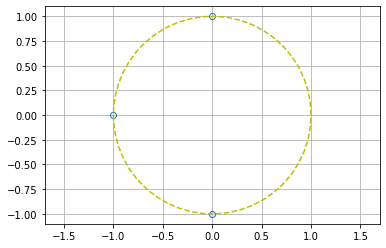

In [ ]:
b4 = np.ones(4) / 4.0
dlti4 = signal.dlti(b4, [1])
draw_pzmap(dlti4)

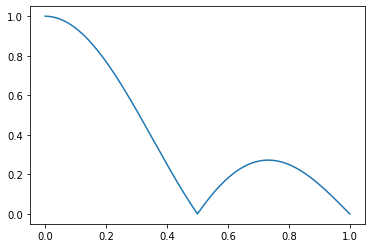

In [ ]:
w, mag = dlti4.freqresp()
plt.plot(w/np.pi, np.abs(mag))

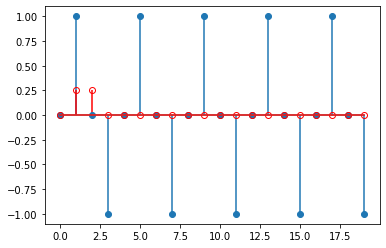

In [ ]:
x = np.array([0, 1, 0, -1] * 5)
y = signal.lfilter(b4, [1], x)

draw_resp_stem(x, y)

In [ ]:
@interact(phase=(0, 90, 5))
def resp(phase=0):
  t = np.arange(16)
  x = np.cos(t * 1/2 * np.pi - phase / 180 * np.pi)
  y = signal.lfilter(b4, [1], x)
  plt.stem(t, x, use_line_collection=True)
  t1 = np.arange(151) / 10
  plt.plot(t1, np.cos(t1 * 1/2 * np.pi - phase / 180 * np.pi), 'y--')
  (markerline, stemlines, baseline) = plt.stem(t, y, linefmt='r', markerfmt='ro', use_line_collection=True)
  markerline.set_markerfacecolor('none')

interactive(children=(IntSlider(value=0, description='phase', max=90, step=5), Output()), _dom_classes=('widge…

## Differentiator

$y[n]=x[n]-x[n-1]$

In [ ]:
bd = [1, -1]
x = np.arange(10, dtype='d')  ** 2 
print(x)
y = signal.lfilter(bd, [1], x)
print(y)
z = signal.lfilter(bd, [1], y)
print(z)
z = signal.lfilter(bd, [1], z)
print(z)

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
[ 0.  1.  3.  5.  7.  9. 11. 13. 15. 17.]
[0. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


Zeros: [1.]
Poles: []


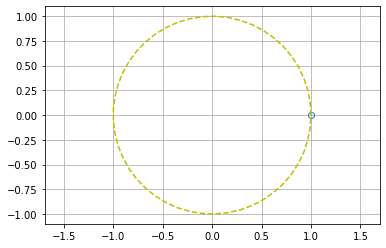

In [ ]:
dlti = signal.dlti(bd, [1])
zeros = dlti.zeros
print('Zeros:', zeros)
print('Poles:', dlti.poles)
draw_pzmap(dlti)

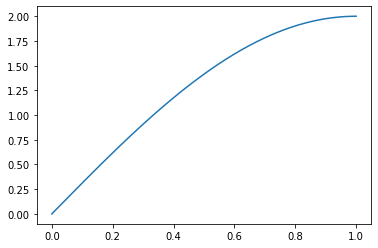

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w/np.pi, np.abs(mag))

**eigenfunction**

In [ ]:
x = 2.0 ** np.arange(14)

y = signal.lfilter(bd, [1], x)
z = signal.lfilter(bd, [1], y)
w = signal.lfilter(bd, [1], z)
np.array([x, y, z, w]).T

array([[   1.,    1.,    1.,    1.],
       [   2.,    1.,    0.,   -1.],
       [   4.,    2.,    1.,    1.],
       [   8.,    4.,    2.,    1.],
       [  16.,    8.,    4.,    2.],
       [  32.,   16.,    8.,    4.],
       [  64.,   32.,   16.,    8.],
       [ 128.,   64.,   32.,   16.],
       [ 256.,  128.,   64.,   32.],
       [ 512.,  256.,  128.,   64.],
       [1024.,  512.,  256.,  128.],
       [2048., 1024.,  512.,  256.],
       [4096., 2048., 1024.,  512.],
       [8192., 4096., 2048., 1024.]])

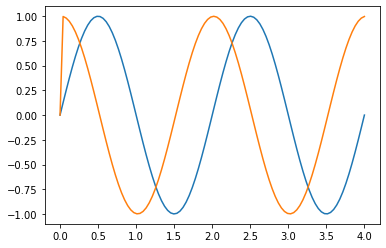

In [ ]:
t = np.linspace(0, 1,100) * 4 * np.pi
x = np.sin(t)
y = signal.lfilter(bd, [1], x)
plt.plot(t/np.pi, x)
plt.plot(t/np.pi, y/(t[1]-t[0]))

## Recursive

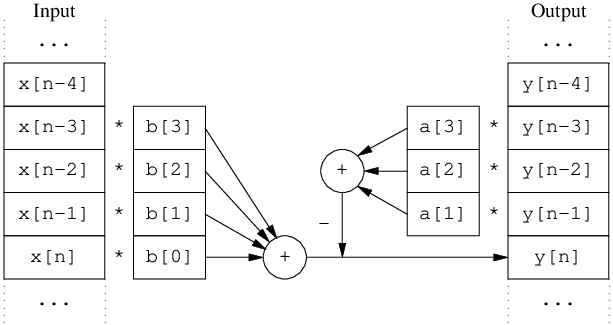

$$y[n] = \sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i]y[n-i]$$

### Accumulator, integrator

$y[n] = x[n] + y[n-1]$

$H(z)=\dfrac{1}{1-z^{-1}}$

Zeros: []
Poles: [1.]


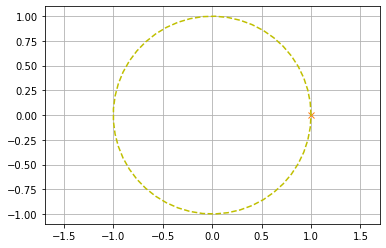

In [ ]:
dlti = signal.dlti([1], [1, -1])
draw_pzmap(dlti)
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)

In [ ]:
b = [1]
a = [1, -1]
x = np.zeros(11)
x[1] = 1
print(x)
y = signal.lfilter(b, a, x=x)
print(y)
z = signal.lfilter(b, a, y)
print(z)
w = signal.lfilter(b, a, z)
print(w)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45. 55.]


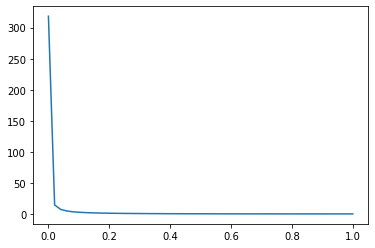

In [ ]:
w, mag = dlti.freqresp(w=np.linspace(np.pi/1000, np.pi))
plt.plot(w/np.pi, np.abs(mag))

In [ ]:
t, y = dlti.impulse(n=20)
plt.stem(t, y[0], use_line_collection=True)

<StemContainer object of 3 artists>

In [ ]:
t, y = dlti.step(n=20)
plt.stem(t, y[0], use_line_collection=True)

<StemContainer object of 3 artists>

In [ ]:
w3 = signal.lfilter(b, a, w)
plt.plot(z)   # linear
plt.plot(w)   # quadratic
plt.plot(w3)  # 3-order

**eigenfunction**

In [ ]:
x = 2.0 ** np.arange(11)
y = signal.lfilter(b, a, x, zi=x[0:1])[0]
z = signal.lfilter(b, a, y, zi=y[0:1])[0]
w = signal.lfilter(b, a, z, zi=z[0:1])[0]
np.array([x, y, z, w]).T

array([[   1.,    2.,    4.,    8.],
       [   2.,    4.,    8.,   16.],
       [   4.,    8.,   16.,   32.],
       [   8.,   16.,   32.,   64.],
       [  16.,   32.,   64.,  128.],
       [  32.,   64.,  128.,  256.],
       [  64.,  128.,  256.,  512.],
       [ 128.,  256.,  512., 1024.],
       [ 256.,  512., 1024., 2048.],
       [ 512., 1024., 2048., 4096.],
       [1024., 2048., 4096., 8192.]])

In [ ]:
t = np.linspace(0, 1,100) * 4 * np.pi
x = np.sin(t)
y = signal.lfilter(b, a, x)
plt.plot(t/np.pi, x)
plt.plot(t/np.pi, y*(t[1]-t[0]))

模拟反向积分器

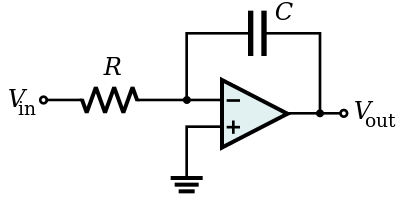



$$V_\text{out}(t_1) = V_\text{out}(t_0) - \frac{1}{RC} \int_{t_0}^{t_1} V_\text{in}(t) \,dt$$

* R = 1 MΩ
* C = 1 μF
* Vin = 1 V (DC)
* Ir = 1 μA
* Vout = -t V
* Vs = ±15V

那么积十几秒就会饱和。

OPA627
* Vos = 100 μV
* Ib = 1 pA

159.2356687898089


### Compound interest

$y[n] = x[n] + a y[n-1]$

$H(z)=\dfrac{1}{1-az^{-1}}$

Zeros: []
Poles: [1.1]


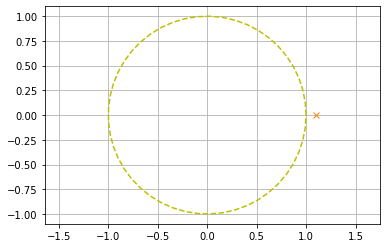

In [ ]:
a = 1.1  # 年投资回报率 10%

dlti = signal.dlti([1], [1, -a])
draw_pzmap(dlti)
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)

<StemContainer object of 3 artists>

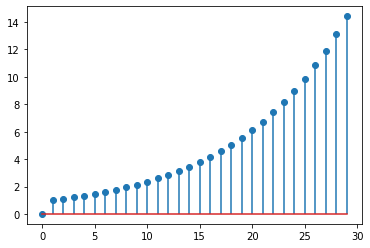

In [ ]:
t, y = dlti.impulse(n=30)
plt.stem(t, y[0], use_line_collection=True)

In [ ]:
t, y = dlti.step(n=30)
plt.stem(t, y[0], use_line_collection=True)

<StemContainer object of 3 artists>

**零状态响应**

年息 1.2%，月息 0.1%，每月存 1000。$a = 1+ 1.2\% / 12 = 1.001$

In [ ]:
rate = 1.2
a = 1.0 + rate / 100 / 12

x = np.ones(12) * 1000
y = signal.lfilter([1], [1, -a], x)
print(np.array([x, np.round(y, 2)]).T)

[[ 1000.    1000.  ]
 [ 1000.    2001.  ]
 [ 1000.    3003.  ]
 [ 1000.    4006.  ]
 [ 1000.    5010.01]
 [ 1000.    6015.02]
 [ 1000.    7021.04]
 [ 1000.    8028.06]
 [ 1000.    9036.08]
 [ 1000.   10045.12]
 [ 1000.   11055.17]
 [ 1000.   12066.22]]


**零输入响应**

年息 1.2%，月息 0.1%，起始存款 10000。

In [ ]:
rate = 1.2
a = 1.0 + rate / 100 / 12
y0 = 10000.0

x = np.zeros(13) * 0.0
y, yn = signal.lfilter([1], [1, -a], x, zi=[y0])
np.set_printoptions(suppress=True)
print(np.array([np.arange(len(x)), np.round(y, 2)]).T)
# print('yn =', np.round(yn, 2))

[[    0.   10000.  ]
 [    1.   10010.  ]
 [    2.   10020.01]
 [    3.   10030.03]
 [    4.   10040.06]
 [    5.   10050.1 ]
 [    6.   10060.15]
 [    7.   10070.21]
 [    8.   10080.28]
 [    9.   10090.36]
 [   10.   10100.45]
 [   11.   10110.55]
 [   12.   10120.66]]


**完全响应**

贷款 20000，年息 3.5%，分 24 期（2 年）偿还，每月还款 864.06。

$p = L\dfrac{c(1+c)^n}{(1+c)^n-1}$, $L=20\,000$, $n = 24$, $c = 3.5\%/12$.

In [ ]:
L = 20000
n = 24
rate = 3.5
c = rate / 100 / 12
p = L * c * np.power(1+c, n) / (np.power(1+c, n) - 1)
print('Monthly payment: %.4f' % p)

Monthly payment: 864.0544


In [ ]:
rate = 3.5
a = 1.0 + rate / 100 / 12
y0 = 20000.0

x = np.concatenate(([0.0], np.ones(24) * -864.06))
y, yn = signal.lfilter([1], [1, -a], x, zi=[y0])
np.set_printoptions(suppress=True)
print(np.array([np.arange(len(x)), np.round(y, 2)]).T)
print('yn =', np.round(yn, 2))

[[    0.   20000.  ]
 [    1.   19194.28]
 [    2.   18386.22]
 [    3.   17575.79]
 [    4.   16763.01]
 [    5.   15947.85]
 [    6.   15130.31]
 [    7.   14310.39]
 [    8.   13488.08]
 [    9.   12663.37]
 [   10.   11836.26]
 [   11.   11006.73]
 [   12.   10174.78]
 [   13.    9340.41]
 [   14.    8503.6 ]
 [   15.    7664.35]
 [   16.    6822.66]
 [   17.    5978.51]
 [   18.    5131.89]
 [   19.    4282.81]
 [   20.    3431.25]
 [   21.    2577.21]
 [   22.    1720.68]
 [   23.     861.65]
 [   24.       0.11]]
yn = [0.11]


### Exponential moving average

$y[n] = ax[n]+(1-a)y[n-1]$

$H(z) = \dfrac{a}{1 - (1-a)z^{-1}}$

证明：对于 x[n] = constant, y[n] 收敛到 constant。

$H(1) = \dfrac{a}{1-(1-a)} = \dfrac{a}{a} = 1$, if $a \ne 0$

Zeros: []
Poles: [0.2]


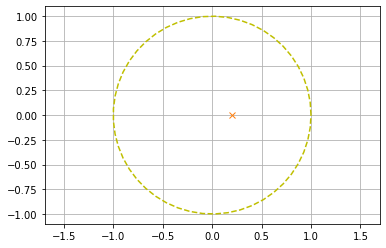

In [ ]:
a = 0.8

dlti = signal.dlti([a], [1, a-1])
draw_pzmap(dlti)
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)

In [ ]:
@interact(a=(0.1, 0.9, 0.1))
def ema(a):
  dlti = signal.dlti([a], [1, a-1])
  t, imp = dlti.impulse()
  plt.stem(t, imp[0], use_line_collection=True)
  plt.figure(2)
  t, step = dlti.step()
  plt.stem(t, step[0], use_line_collection=True)

interactive(children=(FloatSlider(value=0.5, description='a', max=0.9, min=0.1), Output()), _dom_classes=('wid…

In [ ]:
@interact(a=(0.1, 0.9, 0.1))
def ema(a):
  dlti = signal.dlti([a], [1, a-1])
  draw_pzmap(dlti)
  plt.figure(2)
  w, mag = dlti.freqresp()
  plt.plot(w/np.pi, np.abs(mag))
  plt.ylim(0, 1.1)

interactive(children=(FloatSlider(value=0.5, description='a', max=0.9, min=0.1), Output()), _dom_classes=('wid…

**How does TCP calculates RTT**

* [RFC793](https://www.rfc-editor.org/rfc/rfc793) Transmission Control Protocol, 1981 Sept.
* [Jacobson88](https://ee.lbl.gov/papers/congavoid.pdf) Congestion Avoidance and Control, 1988 Nov.
* [RFC1122](https://www.rfc-editor.org/rfc/rfc1122.html) 1989 Oct.
* [RFC2988](https://www.rfc-editor.org/rfc/rfc2988.html) 2000 Nov.
* [RFC6298](https://www.rfc-editor.org/rfc/rfc6298.html) Computing TCP's Retransmission Timer, 2011 June.

**RFC 793**

$$newRTT = \alpha \cdot oldRTT + (1-\alpha) \cdot newRTTsample$$

$$\alpha = 0.9$$

$$y[n] = \alpha \cdot y[n-1] + (1-\alpha) x[n]$$

I found a typo in RFC793 in 2020-10. https://www.rfc-editor.org/errata/eid6305

**RFC 6298**

```
   (2.2) When the first RTT measurement R is made, the host MUST set

            SRTT <- R
            RTTVAR <- R/2
            RTO <- SRTT + max (G, K*RTTVAR)

         where K = 4.

   (2.3) When a subsequent RTT measurement R' is made, a host MUST set

            RTTVAR <- (1 - beta) * RTTVAR + beta * |SRTT - R'|
            SRTT <- (1 - alpha) * SRTT + alpha * R'

         The value of SRTT used in the update to RTTVAR is its value
         before updating SRTT itself using the second assignment.  That
         is, updating RTTVAR and SRTT MUST be computed in the above
         order.

         The above SHOULD be computed using alpha=1/8 and beta=1/4 (as
         suggested in [JK88]).

         After the computation, a host MUST update
         RTO <- SRTT + max (G, K*RTTVAR)
```

$$SRTT \gets (1-\alpha)\cdot SRTT + \alpha \cdot Rsample $$

$$\alpha = \frac{1}{8}$$

$$y[n] = \alpha x[n] + (1-\alpha) y[n-1]$$

### Fibonacci sequence

$y[n] = y[n-1] + y[n-2]$, with $y[-1] = 1$

$H(z) = \dfrac{1}{1-z^{-1}-z^{-2}}$

Zeros: []
Poles: [ 1.61803399 -0.61803399]


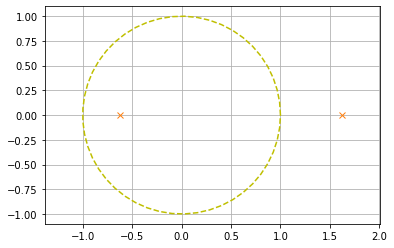

In [ ]:
dlti = signal.dlti([1], [1, -1, -1])
draw_pzmap(dlti)
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)

In [ ]:
dlti.impulse(n=15)[1]

(array([[  0.],
        [  0.],
        [  1.],
        [  1.],
        [  2.],
        [  3.],
        [  5.],
        [  8.],
        [ 13.],
        [ 21.],
        [ 34.],
        [ 55.],
        [ 89.],
        [144.],
        [233.]]),)

### Second order digital sinusoidal oscillator

$y[n]=2\cos(w)y[n-1]-y[n-2]$, with $y[-1] = \sin(w)$

$H(z) = \dfrac{1}{1-2\cos(w)z^{-1}+z^{-2}}$

* Digital resonator
https://ccrma.stanford.edu/~jos/pdf/GordonAndSmith86.pdf
* [MIT OCW 6.003](https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/pages/readings/) notes [Chap 6 - The perfect (sine) wave](https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/resources/mit6_003f11_chap6/) using [leapfrog method](https://en.wikipedia.org/wiki/Leapfrog_integration).

In [ ]:
w = np.pi / 10
dlti = signal.dlti([1], [1, -2 * np.cos(w), 1])
draw_pzmap(dlti)
print('Zeros:', dlti.zeros)
print('Poles:', dlti.poles)
print('Poles amp:', np.abs(dlti.poles), "angle:", np.angle(dlti.poles) / np.pi * 180)

Zeros: []
Poles: [0.95105652+0.30901699j 0.95105652-0.30901699j]
Poles amp: [1. 1.] angle: [ 18. -18.]


In [ ]:
y = dlti.impulse()[1]
plt.plot(y[0])

In [ ]:
# This is numerically instable

fs = 1000
f = 60
w = 2*np.pi*f/fs
c = np.cos(w)
a = [1, -2*c, 1]
n = 101
x = np.zeros(n) * 0.0
y0 = np.sin(w)
y, yn = signal.lfilter([1], a, x, zi=[0, y0])
t = np.arange(n)/fs
plt.plot(t, y)

In [ ]:
print(max(y), min(y))

0.9980267284282738 -0.9980267284282742


In [ ]:
w=2*np.pi*30/1000
c = np.cos(w)
c2=1/(np.exp(1j*w)-np.exp(3j*w))
c1=-c2*np.exp(4j*w)
print(w)
print(c1, c2)
print(np.abs(c1)*2)

In [ ]:
w=2*np.pi*30/1000
c = (np.exp(1j*w)-np.exp(3j*w))
print(c, np.abs(c) )

Why not use `sin()`/`cos()`?

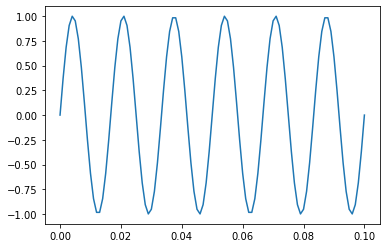

In [ ]:
fs = 1000
f = 60
n = 101
t = np.arange(n) / fs
y1 = np.sin(2 * np.pi * f * t)
plt.plot(t, y1)

In [ ]:
print(y - y1)
print(sum(np.abs(y-y1)))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.33066907e-16  6.66133815e-16  1.22124533e-15  1.38777878e-15
  1.72084569e-15  1.41553436e-15  1.66533454e-15  9.99200722e-16
  5.55111512e-16 -4.44089210e-16 -1.11022302e-15 -1.66533454e-15
 -2.60902411e-15 -3.30291350e-15 -1.88737914e-15 -1.66533454e-15
 -8.88178420e-16  6.66133815e-16  1.88737914e-15  2.77555756e-15
  4.71844785e-15  4.62860957e-15  3.83026943e-15  2.55351296e-15
  1.11022302e-15 -3.33066907e-16 -1.77635684e-15 -3.88578059e-15
 -4.66293670e-15 -4.80171458e-15 -5.96744876e-15 -4.55191440e-15
 -1.66533454e-15 -1.11022302e-16  1.88737914e-15  3.66373598e-15
  6.43929354e-15  7.24420524e-15  6.99440506e-15  4.21884749e-15
  3.88578059e-15  9.99200722e-16 -7.77156117e-16 -3.55271368e-15
 -6.88338275e-15 -6.49480469e-15 -8.25801842e-15 -5.49560397e-15
 -5.10702591e-15 -1.55431223e-15  7.77156117e-16  4.21884749e-15
  5.88418203e-15  8.77076189e-15  1.09634524e-14  8.32667268e-15
  4.88498131e-15  3.44169

## Summary

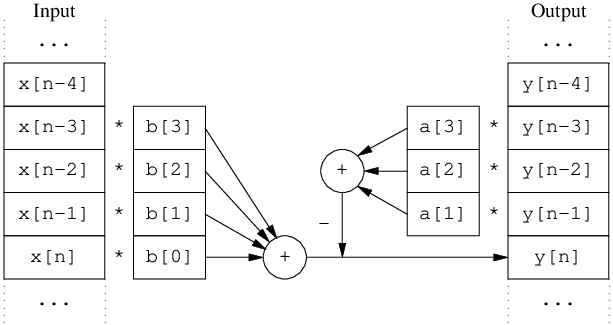

$$\begin{aligned}
y[n] = &\sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i\,]y[n-i\,] \\
 = & \  b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L] \\
        &-(a[1]y[n-1]+a[2]y[n-2]+\cdots+a[M]y[n-M])
\end{aligned}$$

# Lab2: Filtering

https://github.com/chipmuenk/pyfda

## Review DLTI

SISO DLTI system 可由 $\mathbf{a}, \mathbf{b}$ 两个向量，总共 $L+M+1$ 个系数完全定义：

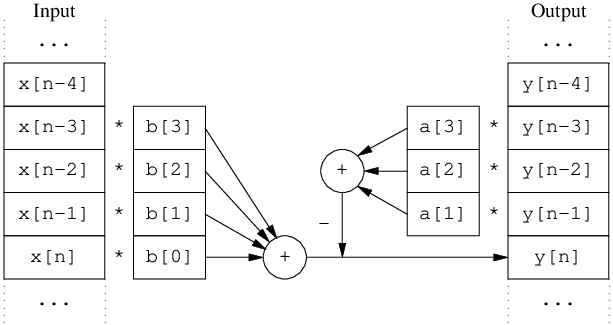

$$\begin{aligned}
y[n] = &\sum_{i=0}^{L}b[i]x[n-i] - \sum_{i=1}^{M}a[i\,]y[n-i\,] \\
 = & \  b[0]x[n] + b[1]x[n-1] + \cdots + b[L]x[n-L] \\
        &-(a[1]y[n-1]+a[2]y[n-2]+\cdots+a[M]y[n-M])
\end{aligned}$$

**模型之间的相互转换**

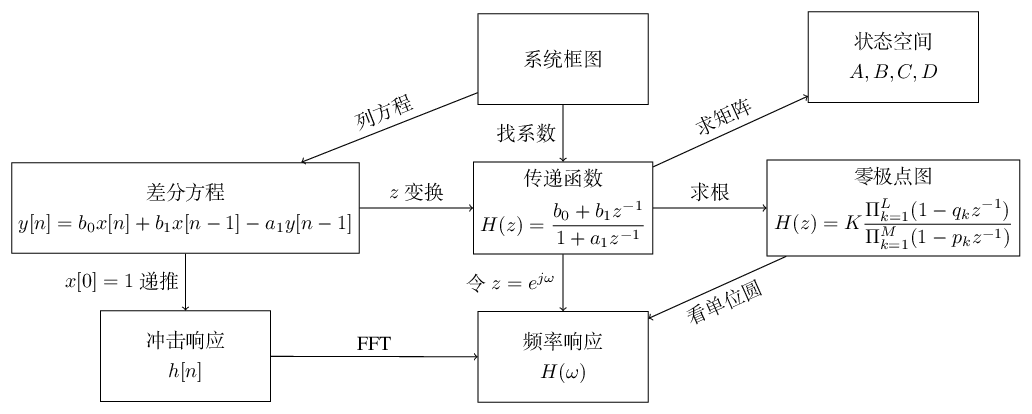

$$\begin{aligned}
y[n] &= \sum_{i=0}^{L}b_ix[n-i\,] - \sum_{i=1}^{M}a_iy[n-i\,] \\
     &=  \  b_0x[n] + b_1x[n-1] + \cdots + b_Lx[n-L] \\
     & \quad   -(a_1y[n-1]+a_2y[n-2]+\cdots+a_My[n-M])\\[3mm]
H(z) &= \frac{\sum_{i=0}^{L}b_iz^{-i}}{1+ \sum_{i=1}^{M}a_iz^{-i}} \\
     &= \frac{b_0 + b_1z^{-1}+b_2z^{-2}+\cdots+b_Lz^{-L}}{1+a_1z^{-1}+a_2z^{-2}+\cdots+a_Mz^{-M}}\\[3mm]
H(z) &= b_0\frac{\prod_{i=1}^L(1-z_iz^{-1})}{\prod_{i=1}^M(1-p_iz^{-1})} \\
     &=b_0\frac{(1-z_1z^-1)(1-z_2z^{-1})\cdots(1-z_Lz^{-1})}{(1-p_1z^-1)(1-p_2z^{-1})\cdots(1-z_Mz^{-1})}
\end{aligned}$$

https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c3.pdf


## Convolution

For LTI systems:

$Output = Convolve(Input, ImpulseResponse)$

Acoustic Impulse Responses

* [Allen Downey - ThinkDSP](https://github.com/AllenDowney/ThinkDSP)
* [Allen Downey - Introduction to Digital Signal Processing - PyCon 2018](https://www.youtube.com/watch?v=SrJq2AzXZME)

A room (e.g. concert hall) behaves like a LTI system for sound.
Here _Time-Invariant_ is assumed.

 * [Open Air Library](https://www.openairlib.net/) - acoustic impulse responses
 * [PyRoomAcoustics](https://pyroomacoustics.readthedocs.io/en/pypi-release/index.html) - Room Acoustics Simulation

Librosa

* https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb
* https://www.youtube.com/watch?v=MhOdbtPhbLU


In [7]:
import librosa as rosa
import librosa.display
from IPython.display import Audio

rosa.version.show_versions()

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


INSTALLED VERSIONS
------------------
python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

librosa: 0.8.1

audioread: 2.1.9
numpy: 1.21.6
scipy: 1.7.3
sklearn: 1.0.2
joblib: 1.1.0
decorator: 4.4.2
soundfile: 0.10.3
resampy: 0.3.1
numba: 0.51.2

numpydoc: None
sphinx: 1.8.6
sphinx_rtd_theme: None
sphinxcontrib.versioning: None
sphinx-gallery: None
pytest: 3.6.4
pytest-mpl: None
pytest-cov: None
matplotlib: 3.2.2
presets: None


In [ ]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x, sr = rosa.load('/content/drive/MyDrive/openair/poem.flac')

Audio(x, rate=sr) # normalize=False

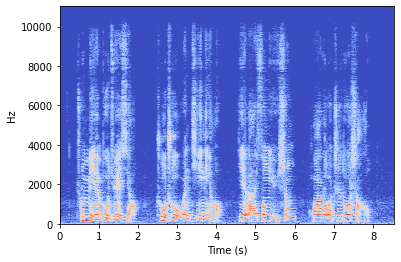

In [7]:
f = rosa.stft(x)
rosa.display.specshow(rosa.power_to_db(np.abs(f)**2), sr=sr, y_axis='hz', x_axis='s')

**火车隧道**

https://www.openair.hosted.york.ac.uk/?page_id=525

In [14]:
h1, sr = rosa.load('/content/drive/MyDrive/openair/innocent-railway-tunnel/middle_tunnel_1way_mono.flac')

Audio(h1, rate=sr) # normalize=False 

In [40]:
y1 = signal.oaconvolve(x, h1, mode='full')
print(len(y1)/sr)
Audio(y1, rate=sr) # normalize=False

13.521768707482993


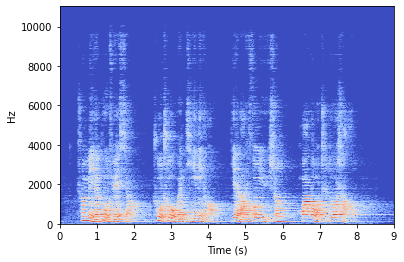

In [26]:
f1 = rosa.stft(y1[0:sr*9])
rosa.display.specshow(rosa.amplitude_to_db(np.abs(f1)), sr=sr, y_axis='hz', x_axis='s')

**英国 York 大学 Central Hall**

https://www.openair.hosted.york.ac.uk/?page_id=435

In [32]:
h2, sr = rosa.load('/content/drive/MyDrive/openair/central-hall-university-york/ir_row_1l_sl_centre_ch2.flac')
Audio(h2, rate=sr) # normalize=False 

In [41]:
y2 = signal.convolve(x, h2)
print(len(y2)/sr)
Audio(y1, rate=sr) # normalize=False

11.021360544217687


In [43]:
f2 = rosa.stft(y2[0:sr*9])
rosa.display.specshow(rosa.amplitude_to_db(np.abs(f2)), sr=sr, y_axis='hz', x_axis='s')

**Deconvolution**

https://en.wikipedia.org/wiki/Deconvolution

One of Prof. Alan V. Oppenheim's faviourite examples: Digital restoration of Enrico Caruso's recordings by Thomas Stockham. 1975 paper: "Blind deconvolution through Digital Signal Processing".

* [MIT RES.6-007 Signals ans Systems, 1987](https://youtu.be/KJnAy6hzetw?t=760)
* [MIT RES.6-008 Digital Signal Processing, 1975](https://youtu.be/rkvEM5Y3N60?t=338)
* [MITx 6.341x Discrete-Time Signal Processing, 2016](https://learning.edx.org/course/course-v1:MITx+6.341x_2+2T2016/block-v1:MITx+6.341x_2+2T2016+type@sequential+block@Enrichment_lecture_How_Caruso_Lost_His_Orchestra/block-v1:MITx+6.341x_2+2T2016+type@vertical+block@Enrichment_Lecture_2_Video_3)



## FIR using Remez

$H(\omega) = H(z)|_{z=e^{j\omega}}$, $0 \le \omega \le \pi$

$H(z) =  \frac{b_0 + b_1z^{-1}+b_2z^{-2}+\cdots+b_Nz^{-N}}{1+a_1z^{-1}+a_2z^{-2}+\cdots+a_Mz^{-M}}$

For FIR, $a_i = 0,\ i > 0$

$H(z) = b_0 + b_1z^{-1}+b_2z^{-2}+\cdots+b_Nz^{-N}$

$H(w) = H(z)|_{z=e^{jw}} = b_0 + b_1e^{-1jw}+b_2e^{-2jw}+\cdots+b_Ne^{-jNw}$

$H(w) = \sum_{k=0}^N b_k e^{-jkw}$, this is DTFT.

Choose $b_k$ to minimize difference between $H(w)$ and the desired frequency response. 

Parks-McClellan algorithm 1973.

https://eeweb.engineering.nyu.edu/iselesni/EL713/remez/remez.pdf

In [ ]:
x, sr = rosa.load(rosa.example('brahms'))
print("Sample rate: %d, original length %.2f sec" % (sr, len(x) / sr))

x = x[0:int(sr*13.6)]
Audio(x, rate=sr) # normalize=False 

Sample rate: 22050, original length 45.84 sec


In [ ]:
f1 = rosa.stft(x)
rosa.display.specshow(rosa.amplitude_to_db(np.abs(f1)), sr=sr, y_axis='hz', x_axis='s')

固定电话的带宽是 200 Hz ~ 3.4 kHz，这里用低通模拟。

三个相互制约的因素：
* tap 数
* 阻带衰减 (dB)
* 过渡带宽度 (Hz)

Text(0.5, 0, 'Hz')

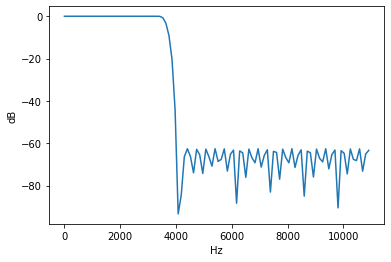

In [ ]:
numtaps = 128
h = signal.remez(numtaps, bands=[0, 3400, 4000, 0.5*sr], desired=[1, 0], fs=sr)

dlti = signal.dlti(h, [1])
w, mag, phase = dlti.bode()
plt.plot(w/(2*np.pi)*sr, mag)
plt.ylabel('dB'); plt.xlabel('Hz')
# plt.figure(2)
# plt.plot(w/np.pi, phase)

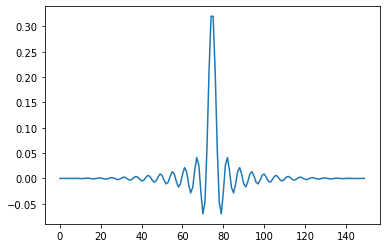

In [ ]:
plt.plot(h)

In [ ]:
# Filter
y = signal.oaconvolve(x, h, mode='full')  # 'full', 'valid', 'same'
print('%.3f' % (len(y)/sr))
Audio(y, rate=sr) # normalize=False

13.606


In [ ]:
f2 = rosa.stft(y)
rosa.display.specshow(rosa.power_to_db(np.abs(f2)**2), sr=sr, y_axis='hz', x_axis='s')

In [ ]:
draw_pzmap(dlti)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
rosa.display.specshow(rosa.power_to_db(np.abs(f1)**2), sr=sr, y_axis='hz', x_axis='s')
plt.subplot(122)
rosa.display.specshow(rosa.power_to_db(np.abs(f2)**2), sr=sr, y_axis='hz', x_axis='s')

可见 4kHz 以上的高频被滤得干干净净。

当然，这只是原理验证，离实时的定点 DSP 实现还有相当的距离。

## DC blocker

Julius O. Smith, Introduction to Digital Filters with Audio Applications, http://ccrma.stanford.edu/~jos/filters/

Appendix B.3 https://ccrma.stanford.edu/~jos/filters/DC_Blocker.html

$y[n] = x[n]-x[n-1]+Ry[n-1]$

$H(z)=\dfrac{1-z^{-1}}{1-Rz^{-1}}$

It's a differentiator with exponential moving average.

Zeros: [1.]
Poles: [0.9]


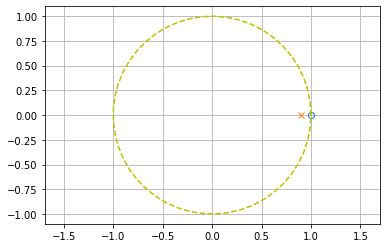

In [ ]:
R = 0.9
b = [1, -1]
a = [1, -R]
dlti = signal.dlti(b, a)
zeros = dlti.zeros
print('Zeros:', zeros)
print('Poles:', dlti.poles)
draw_pzmap(dlti)

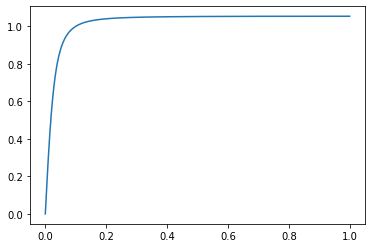

In [ ]:
w, mag = dlti.freqresp()
plt.plot(w/np.pi, np.abs(mag))

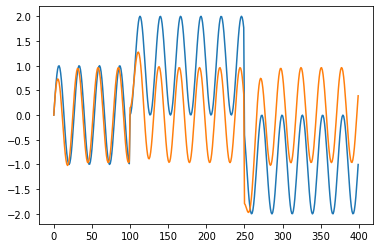

In [ ]:
t = np.linspace(0, 1, 400) * 2 *np.pi * 15
x = np.sin(t)
dc = np.concatenate([np.zeros(100), np.ones(150), -1 * np.ones(150)])
x = dc + x

y = signal.lfilter(b, a, x)
plt.plot(x)
plt.plot(y)

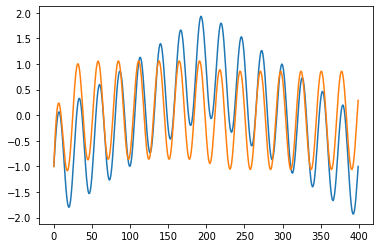

In [ ]:
t = np.linspace(0, 1, 400) * 2 *np.pi
x = np.sin(t * 15)
triangle = signal.sawtooth(t, 0.5)
x = x + triangle

y = signal.lfilter(b, a, x)
plt.plot(x)
plt.plot(y)

In [45]:
@interact(R=(0, 1, 0.01))
def blocker(R=0.5):
  b = [1, -1]
  a = [1, -R]
  dlti = signal.dlti(b, a)
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  draw_pzmap(dlti)
  w, mag = dlti.freqresp()
  plt.subplot(122)
  plt.plot(w/np.pi, np.abs(mag))

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), Output()), _dom_classes=('w…

## IIR Notch
https://www.mathworks.com/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html

Sophocles J. Orfanidis. _Introduction to Signal Processing, 1996._ 

§11.3 Second-Order Peaking and Notching Filters

https://www.ece.rutgers.edu/~orfanidi/intro2sp/



In [47]:
fs=1000
b, a = signal.iirnotch(60, Q=30, fs=fs)
d = signal.dlti(b, a)
print('b=', np.round(b, 5))
print('a=', np.round(a, 5))

b= [ 0.99376 -1.84794  0.99376]
a= [ 1.      -1.84794  0.98751]


$y[n] = 0.99376\,x[n] - 1.84794\,x[n-1] + 0.99376\,x[n-2] + 1.84794\,y[n-1] - 0.98751\,y[n-2]$

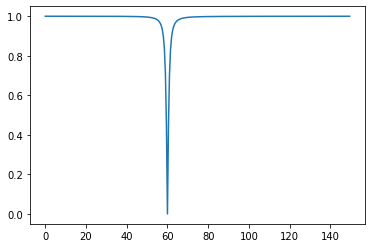

In [50]:
w, amp = d.freqresp(n=1000)
w=w[0:300]
amp=amp[0:300]
plt.plot(w/(2*np.pi)*fs, np.abs(amp))

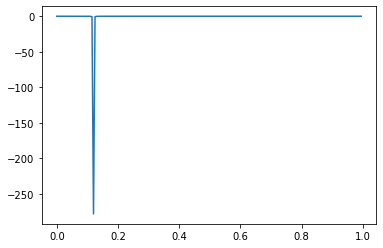

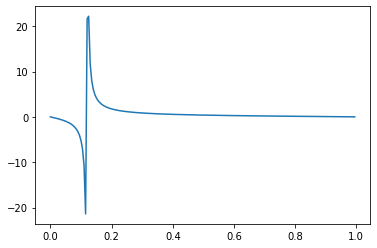

In [55]:
w, mag, phase = d.bode(n=200)
plt.plot(w/np.pi, mag)
plt.figure()
plt.plot(w/np.pi, phase)

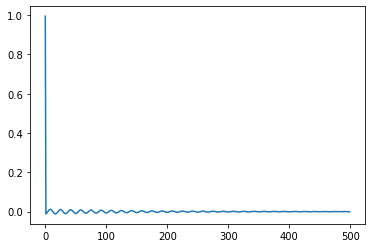

In [65]:
t, y = d.impulse(n=500)
plt.plot(t, y[0])

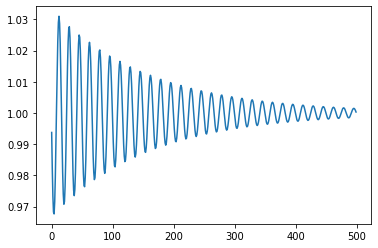

In [59]:
t, y = d.step(n=500)
plt.plot(t, y[0])

zeros 1.00000 60.000Hz
poles 0.99374 59.992Hz


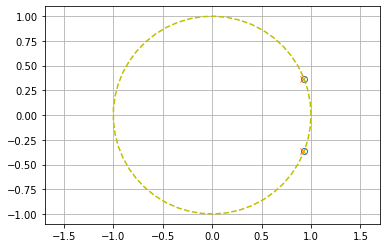

In [ ]:
print('zeros %.5f %.3fHz' % (np.abs(d.zeros[0]), np.angle(d.zeros[0]) * fs / (2*np.pi)))
print('poles %.5f %.3fHz' % (np.abs(d.poles[0]), np.angle(d.poles[0]) * fs / (2*np.pi)))
draw_pzmap(d)

**EEG**

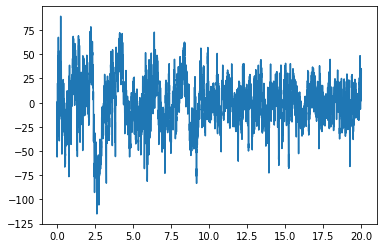

In [19]:
eeg = np.loadtxt('/content/drive/MyDrive/openair/eeg_data.txt').T
fs = 500
x = eeg[0]
t = np.arange(len(x)) / fs
plt.plot(t, x)


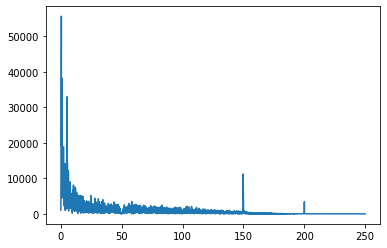

In [27]:
fft = np.fft.rfft(x)
freq = np.arange(len(fft)) / len(fft) * fs / 2
plt.plot(freq, np.abs(fft))

# Lab3: Frequency Analysis

## DTMF


|        | 1209 Hz | 1336 Hz | 1447 Hz |
| -----: | :-----: | :-----: | :-----: |
| 697 Hz |  **1**  |  **2**  |  **3**  |
| 770 Hz |  **4**  |  **5**  |  **6**  |
| 852 Hz |  **7**  |  **8**  |  **9**  |
| 941 Hz |  **$*$** |  **0**  |  **#**  |


In [ ]:
freqs = np.array([697, 770, 852, 941, 1209, 1336, 1447])
np.diff(freqs)


array([ 73,  82,  89, 268, 127, 111])

freqs * 1.035

In [ ]:
@interact(nfft = (60, 250, 5))
def how_many_bins(nfft=105):
  sr = 8000
  t = np.arange(nfft)/sr
  x = np.sin(2*np.pi* freqs.reshape(len(freqs), 1) * t)
  print('bin = %.2f Hz' % (sr / nfft))
  for i in x:
    fft = np.fft.rfft(i)
    plt.plot(np.abs(fft[0:(nfft//4)])/nfft)


interactive(children=(IntSlider(value=105, description='nfft', max=250, min=60, step=5), Output()), _dom_class…

### Goertzel algorithm
https://en.wikipedia.org/wiki/Goertzel_algorithm

$y[n]=x[n]+2\cos(\omega)y[n-1]-y[n-2]$

$\omega = \dfrac{2\pi k} { N}$

In [ ]:
N = 205
sr = 8000
print('%.2f Hz' % (sr / N))

k = np.array([18, 20, 22, 24, 31, 34, 37])
k * sr / N - freqs 

39.02 Hz


array([ 5.43902439, 10.48780488,  6.53658537, -4.41463415,  0.75609756,
       -9.17073171, -3.09756098])

In [ ]:
N = 205
sr = 8000
t = np.arange(N) / sr
x = np.cos(t * 2 * np.pi * 697)

bin = 18
fft = np.fft.rfft(x)
print('fft:', fft[bin])

wk = np.exp(1j * bin * 2 * np.pi * np.arange(N) / N)
dft = np.vdot(wk, x)
print('dft:', dft)
print('diff:', dft - fft[bin])



fft: (89.75850817734614-42.23143015507722j)
dft: (89.75850817734626-42.231430155077035j)
diff: (1.1368683772161603e-13+1.8474111129762605e-13j)


In [ ]:
s2 = 0
s1 = 0
s0 = 0
w = bin * 2 * np.pi / N
c = np.cos(w)
c2 = 2 * c
# print(c)
for p in x:
  s0 = p + c2 * s1 - s2
  s2 = s1
  s1 = s0
# s0 = c * s1
#print(s2)
goert = s2-np.exp(-1j*w) * s1

print(dft) 
print(goert)
print(np.real(dft) + np.real(goert), (np.imag(dft) - np.imag(goert)))

power = s1 * s1 + s2 * s2 - c2 * s1 * s2

print(power)
print(np.real_if_close(dft * dft.conj()))

(89.75850817734626-42.231430155077035j)
(-89.75850817734629-42.231430155076346j)
-2.842170943040401e-14 -6.892264536872972e-13
9840.083483165832
9840.083483165885


### Real world requirements

https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling

https://web.archive.org/web/20110925184759/http://nemesis.lonestar.org/reference/telecom/signaling/dtmf.html

DTMF receiver chips:
* CM8870CSI (obsoleted) by California Micro Devices Corp. 215 Topaz Street, Milpitas, California  95035
* MT8870D from Zarlink (active)
 


## DFT and FFT

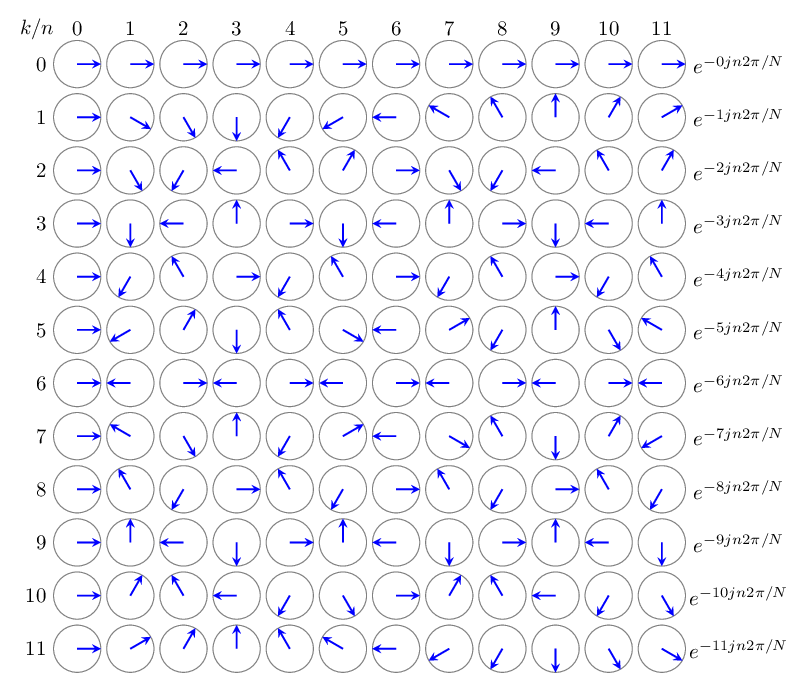

## Spectrogram

# Lab4: Sampling, alias, modulation

https://www.youtube.com/watch?v=2wO8ZHnn3Q4 Hamming

https://www.engr.colostate.edu/ECE423/course_info.shtml DSP for Communications,

# Lab5: Advanced

https://en.wikipedia.org/wiki/Audio_time_stretching_and_pitch_scaling

## Heartbeat rate from camera

Berkeley EE120 Lab4

https://github.com/dominiccarrano/ee-120-labs/blob/master/lab4/lab4.ipynb